In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, accuracy_score

# Kunskapskontroll

### Fyll i uppgifterna nedan innan du lämnar in på LearnPoint: 
Namn på samtliga gruppmedlemmar: 

# Project Steps

* Import & Analyze the Data
* Analyze features & measue feature importance
* Clean up data missing values
* Transform Data
* Build pipeline (-> Transform data, Scale Data )
* GridSearch parametergrid for models
* Validate model
* Test model

# Code

#### Loading Data

In [2]:
# Importing Data
imported_data = pd.read_csv(r'.\kunskapskontroll_ai2_del1\housing.csv')
imported_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data = imported_data

# Creating new feature columns in the Dataset
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_household'] = data['total_bedrooms'] / data['households']
data['population_per_household'] = data['population'] / data['households']

# Transforming 'ocean_proximity' feature using dummy variable encoding
data = pd.get_dummies(data, columns=['ocean_proximity'], dtype=int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   rooms_per_household         20640 non-null  float64
 10  bedrooms_per_household      20433 non-null  float64
 11  population_per_household    20640 non-null  float64
 12  ocean_proximity_<1H OCEAN   20640 non-null  int32  
 13  ocean_proximity_INLAND      206

In [4]:
# List of features used for the training data:
housing_features = [
    'longitude',
    'latitude',
    'median_income',
    'rooms_per_household',
    'bedrooms_per_household',
    'population_per_household',
    'ocean_proximity_<1H OCEAN',
    'ocean_proximity_INLAND', 
    'ocean_proximity_ISLAND', 
    'ocean_proximity_NEAR BAY', 
    'ocean_proximity_NEAR OCEAN',
    'median_house_value'
]
housing = data[housing_features]
print('Housing dataset features:\n\n',housing.dtypes)

Housing dataset features:

 longitude                     float64
latitude                      float64
median_income                 float64
rooms_per_household           float64
bedrooms_per_household        float64
population_per_household      float64
ocean_proximity_<1H OCEAN       int32
ocean_proximity_INLAND          int32
ocean_proximity_ISLAND          int32
ocean_proximity_NEAR BAY        int32
ocean_proximity_NEAR OCEAN      int32
median_house_value            float64
dtype: object


## EDA

In [5]:
# Defining Median House Value as target variable.
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)


#### Checking Missing Values

In [6]:
# Checking for missing Values
print('Null values:\n\n', housing.isnull().sum())

Null values:

 longitude                       0
latitude                        0
median_income                   0
rooms_per_household             0
bedrooms_per_household        207
population_per_household        0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
median_house_value              0
dtype: int64


In [7]:
# Drop all null values
## Use Imputer instead
housing.dropna(inplace=True)

print('Null values have been dropped:\n\n', housing.isnull().sum())

Null values have been dropped:

 longitude                     0
latitude                      0
median_income                 0
rooms_per_household           0
bedrooms_per_household        0
population_per_household      0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
median_house_value            0
dtype: int64


C:\Users\Holt\AppData\Local\Temp\ipykernel_101356\795602734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing.dropna(inplace=True)


#### Inspecting Dataset

In [8]:
# Inspecting Dataset
print(housing.describe())

          longitude      latitude  median_income  rooms_per_household  \
count  20433.000000  20433.000000   20433.000000         20433.000000   
mean    -119.570689     35.633221       3.871162             5.431344   
std        2.003578      2.136348       1.899291             2.482946   
min     -124.350000     32.540000       0.499900             0.846154   
25%     -121.800000     33.930000       2.563700             4.441441   
50%     -118.490000     34.260000       3.536500             5.230769   
75%     -118.010000     37.720000       4.744000             6.052381   
max     -114.310000     41.950000      15.000100           141.909091   

       bedrooms_per_household  population_per_household  \
count            20433.000000              20433.000000   
mean                 1.097062                  3.071533   
std                  0.476104                 10.438269   
min                  0.333333                  0.692308   
25%                  1.006029                  

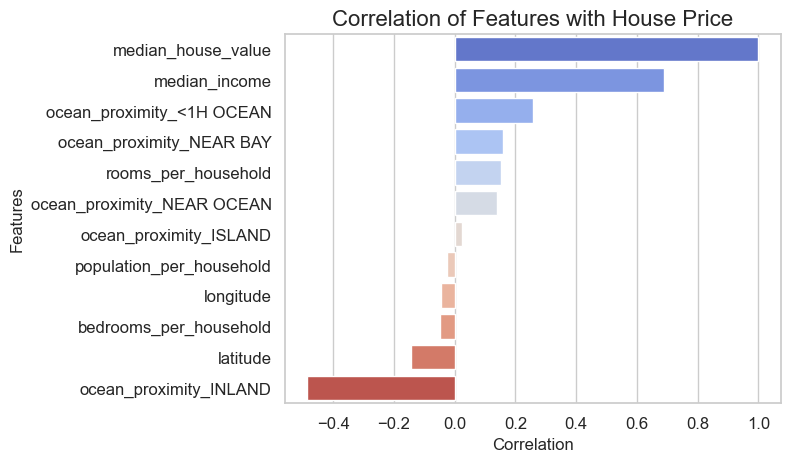

In [9]:
# Visualising Housing dataset Correlation
correlation_matrix = housing.corr()
target_correlations = correlation_matrix['median_house_value'].sort_values(ascending=False)
sns.set(style="whitegrid")

# Correlation Barplot
bar_plot = sns.barplot(x=target_correlations.values, y=target_correlations.index, palette="coolwarm")
plt.title("Correlation of Features with House Price")
bar_plot.set_title("Correlation of Features with House Price", fontsize=16)
bar_plot.set_xlabel("Correlation")
bar_plot.set_ylabel("Features")
bar_plot.tick_params(labelsize=12)
plt.show()

## Data Cleanup

## Model